<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/correlacao_ativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install yfinance
!pip install investpy

     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 235 kB 50.9 MB/s 
     |████████████████████████████████| 503 kB 61.3 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=31508ef529c13319c091c06aaf9be701b13c59d8a486cd02508161a9ff128541
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [50]:
ativos = ['PETR4.SA','VALE3.SA','WEGE3.SA','LOGN3.SA','ITUB4.SA','RADL3.SA','B3SA3.SA','SMAL11.SA']

In [51]:
inicio = '2019-01-01'
fim = '2021-08-24'

In [52]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [53]:
precos.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,LOGN3.SA,ITUB4.SA,RADL3.SA,B3SA3.SA,SMAL11.SA
Date,,,,,,,,
2019-01-02,18.925688,39.107300,8.611480,8.13,33.008648,11.063239,8.111493,89.000000
2019-01-03,19.389780,37.507488,8.807849,8.31,33.552834,11.037874,8.464676,89.000000
2019-01-04,19.444839,39.949303,8.908428,8.38,32.990814,11.195921,8.158196,90.500000
2019-01-07,19.751619,39.734974,8.769531,8.25,33.053253,10.946170,8.114412,88.199997
2019-01-08,19.633627,40.117710,8.697690,7.95,33.472557,11.346163,8.137764,88.830002


In [55]:
ativos_retornos = precos.pct_change()
ativos_retornos.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,LOGN3.SA,ITUB4.SA,RADL3.SA,B3SA3.SA,SMAL11.SA
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.024522,-0.040908,0.022803,0.022140,0.016486,-0.002293,0.043541,0.000000
2019-01-04,0.002840,0.065102,0.011419,0.008424,-0.016750,0.014319,-0.036207,0.016854
2019-01-07,0.015777,-0.005365,-0.015592,-0.015513,0.001893,-0.022307,-0.005367,-0.025414
2019-01-08,-0.005974,0.009632,-0.008192,-0.036364,0.012686,0.036542,0.002878,0.007143


In [56]:
ativos_retornos = ativos_retornos.dropna()

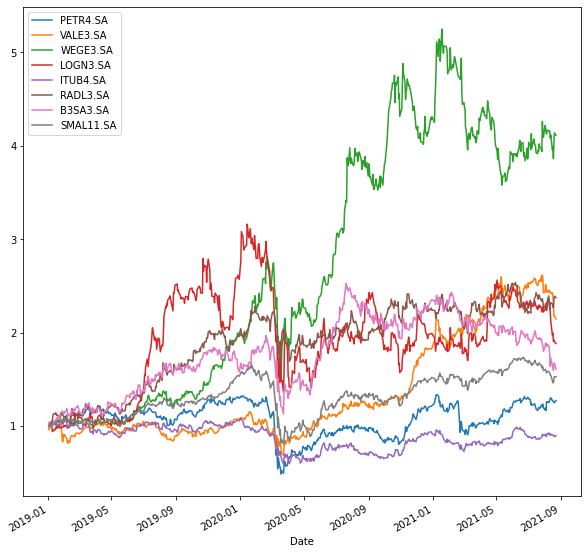

In [57]:
normalizado = precos/precos.iloc[0]
normalizado.plot(figsize=(10,10))

In [58]:
ativos_retornos.std()

PETR4.SA     0.032097
VALE3.SA     0.028373
WEGE3.SA     0.027109
LOGN3.SA     0.040477
ITUB4.SA     0.022976
RADL3.SA     0.022215
B3SA3.SA     0.027642
SMAL11.SA    0.021757
dtype: float64

In [59]:
volatilidade = pd.DataFrame(ativos_retornos.std(), columns=['Vol'])
retornos_medios = pd.DataFrame(ativos_retornos.mean(), columns=['Returns'])
risco_retorno=pd.concat([retornos_medios, volatilidade], axis=1)
risco_retorno

,Returns,Vol
PETR4.SA,0.000904,0.032097
VALE3.SA,0.001575,0.028373
WEGE3.SA,0.002535,0.027109
LOGN3.SA,0.001774,0.040477
ITUB4.SA,0.000094,0.022976
RADL3.SA,0.001570,0.022215
B3SA3.SA,0.001110,0.027642
SMAL11.SA,0.000891,0.021757


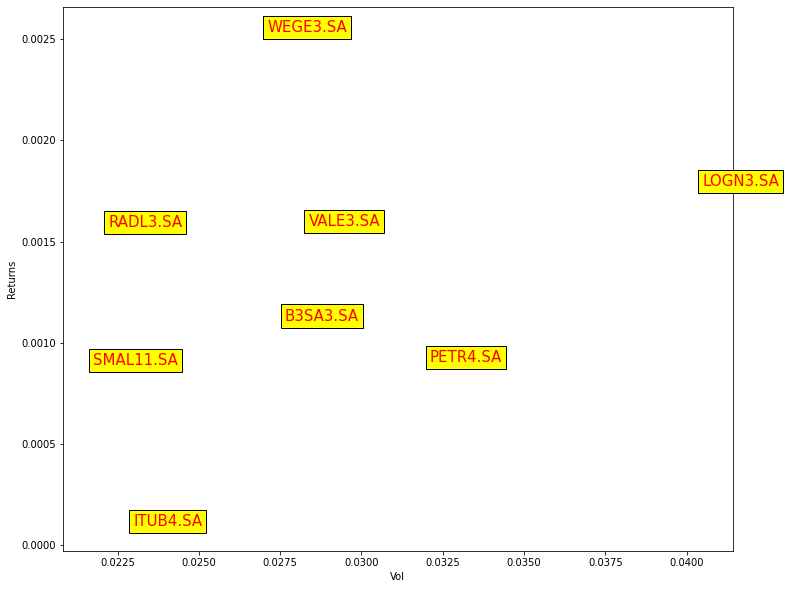

In [60]:
plt.subplots(figsize=(12,10))
sns.scatterplot(data=risco_retorno, x='Vol', y='Returns')

for i in range(risco_retorno.shape[0]):
  plt.text(x=risco_retorno.Vol[i], y=risco_retorno.Returns[i],
           s=risco_retorno.index[i],
           fontdict=dict(color='red', size=15),
           bbox=dict(facecolor='yellow'))